In [87]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from itertools import combinations
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [88]:
world_data = pd.read_csv("world.csv")
life_data = pd.read_csv("life.csv")

In [89]:
# Merge and sort data on 'Country Code', then replace '..' with NaN
join_data = world_data.merge(life_data, on = 'Country Code')
join_data.drop(['Country','Year'], axis = 1, inplace = True)
join_data.sort_values('Country Code', ascending = True, inplace = True)
join_data.replace(r'..', np.nan, inplace = True)

In [90]:
# Find all features of data
features = [column for column in join_data.columns.tolist() if column not in ['Country Name', 'Country Code', 'Time', 'Life expectancy at birth (years)']]
features

['Access to electricity (% of population) [EG.ELC.ACCS.ZS]',
 'Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD]',
 'Age dependency ratio (% of working-age population) [SP.POP.DPND]',
 'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]',
 'Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD]',
 'Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]',
 'Fixed broadband subscriptions (per 100 people) [IT.NET.BBND.P2]',
 'Fixed telephone subscriptions (per 100 people) [IT.MLT.MAIN.P2]',
 'GDP per capita (constant 2010 US$) [NY.GDP.PCAP.KD]',
 'GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]',
 'Individuals using the Internet (% of population) [IT.NET.USER.ZS]',
 'Lifetime risk of maternal death (%) [SH.MMR.RISK.ZS]',
 'People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS]',
 'People using at least basic drinking water services, ru

In [91]:
# Split data into features and class feature
X = join_data[features]
y = join_data['Life expectancy at birth (years)']

In [92]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 200)

In [93]:
X_train

,Access to electricity (% of population) [EG.ELC.ACCS.ZS],Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD],Age dependency ratio (% of working-age population) [SP.POP.DPND],"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]",Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD],"Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]",Fixed broadband subscriptions (per 100 people) [IT.NET.BBND.P2],Fixed telephone subscriptions (per 100 people) [IT.MLT.MAIN.P2],GDP per capita (constant 2010 US$) [NY.GDP.PCAP.KD],"GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]",Individuals using the Internet (% of population) [IT.NET.USER.ZS],Lifetime risk of maternal death (%) [SH.MMR.RISK.ZS],People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS],"People using at least basic drinking water services, rural (% of rural population) [SH.H2O.BASW.RU.ZS]","People using at least basic drinking water services, urban (% of urban population) [SH.H2O.BASW.UR.ZS]","People using at least basic sanitation services, urban (% of urban population) [SH.STA.BASS.UR.ZS]",Prevalence of anemia among children (% of children under 5) [SH.ANM.CHLD.ZS],Secure Internet servers (per 1 million people) [IT.NET.SECR.P6],"Self-employed, female (% of female employment) (modeled ILO estimate) [SL.EMP.SELF.FE.ZS]","Wage and salaried workers, female (% of female employment) (modeled ILO estimate) [SL.EMP.WORK.FE.ZS]"
59,91.05812836,4987.601308,67.20863011,49.9,219.9850922,4.039,0.747955672,0.943585575,9419.856712,7080,48.05227375,1.095333321,85.62704687,55.05480828,89.57669523,48.65327072,62.5,22.41177604,40.4109993,59.5890007
33,100,10755.31922,45.30184992,8.1,1190.548584,1.713,15.95128317,18.53492447,14771.25765,13420,83.55858602,0.023301792,99.62218018,98.3252178,99.80878307,100,20,1237.18578,25.9829998,74.01699829
10,100,27169.17566,43.32397891,16.9,1837.258789,1.771,22.52480618,32.03979573,27370.20254,28910,80,0.125916474,98.8869605,NaN,NaN,NaN,29.5,1053.102286,8.201999664,91.79799652
25,23.65287399,414.3358957,91.56125413,56.3,40.95466232,5.353,0.066415118,0.406122225,663.8474288,600,13.96,1.829265196,48.26771688,36.04523782,79.48903443,40.13079418,86.2,1.823410423,90.68699646,9.312999725
23,100,24338.80432,39.24499889,7.8,686.4823608,1.915,8.604097189,17.67818009,31685.22545,33160,90,0.06090028,99.90000909,NaN,NaN,NaN,16.1,612.1962839,7.955999851,92.04399872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,100,13355.25137,50.89273244,5.4,1321.620239,1.63,28.91055035,16.56101029,21863.64165,17590,76.4811987,0.00602772,99.88016949,99.8175993,99.90265093,99.09274194,25.8,11991.38925,13.22999954,86.76999664
66,91.92584229,3494.706279,67.37000913,25.1,248.8022003,2.973,3.05130363,14.80291111,3100.829958,3800,34.50932609,0.320602352,93.72089205,89.66381373,97.72652989,79.37134783,36.5,36.18150088,47.38299942,52.61700058
11,100,19133.21509,29.4204093,6.9,1099.362305,2.033,16.29866067,19.62866954,22336.77993,21610,97.9999807,0.034427671,100,NaN,NaN,NaN,30.1,346.474343,3.118000031,96.88200378
102,99.96797943,7382.518121,32.63405994,8,1052.516113,1.947,6.163672,4.445103383,7631.471877,8070,59.09258997,0.125220073,99.23921181,99.85330875,98.27685084,99.1348876,39,212.4021846,35.01800156,64.98200226


In [94]:
print("Number of missing values of each column")
for name in X_train.columns:
    print(f"{name}: {X_train[name].isna().sum()}")

Number of missing values of each column
Access to electricity (% of population) [EG.ELC.ACCS.ZS]: 0
Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD]: 8
Age dependency ratio (% of working-age population) [SP.POP.DPND]: 1
Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]: 0
Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD]: 7
Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]: 0
Fixed broadband subscriptions (per 100 people) [IT.NET.BBND.P2]: 4
Fixed telephone subscriptions (per 100 people) [IT.MLT.MAIN.P2]: 0
GDP per capita (constant 2010 US$) [NY.GDP.PCAP.KD]: 5
GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]: 6
Individuals using the Internet (% of population) [IT.NET.USER.ZS]: 1
Lifetime risk of maternal death (%) [SH.MMR.RISK.ZS]: 0
People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS]: 0
People using at least basic dr

In [95]:
# Impute with median
my_imputer = SimpleImputer(strategy = 'median')

imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_test = pd.DataFrame(my_imputer.transform(X_test))

imputed_X_train.columns = X_train.columns
imputed_X_test.columns = X_test.columns

In [96]:
# Extract the abbreviations of features' names
short_features = []
for feature in features:
    shortened = re.findall('\[(.*)?\]', feature)
    short_features.append(shortened[0])

short_features

['EG.ELC.ACCS.ZS',
 'NY.ADJ.NNTY.PC.CD',
 'SP.POP.DPND',
 'SH.DTH.COMM.ZS',
 'SH.XPD.CHEX.PC.CD',
 'SP.DYN.TFRT.IN',
 'IT.NET.BBND.P2',
 'IT.MLT.MAIN.P2',
 'NY.GDP.PCAP.KD',
 'NY.GNP.PCAP.CD',
 'IT.NET.USER.ZS',
 'SH.MMR.RISK.ZS',
 'SH.H2O.BASW.ZS',
 'SH.H2O.BASW.RU.ZS',
 'SH.H2O.BASW.UR.ZS',
 'SH.STA.BASS.UR.ZS',
 'SH.ANM.CHLD.ZS',
 'IT.NET.SECR.P6',
 'SL.EMP.SELF.FE.ZS',
 'SL.EMP.WORK.FE.ZS']

In [97]:
# Extract the combination of the features
generated_features = list(combinations(features,2))
short_generated_features = list(combinations(short_features,2))

In [98]:
# Make all values numeric
join_data[features] = join_data[features].apply(pd.to_numeric)

## Method 1: Feature Engineering Using Feature Generation And KMeans Clustering

In [99]:
def generate_features(data, short_generated_features, generated_features):
    ''' Generate new features by multiplying 2 different features in the data '''
    new_data = data.copy()
    for i in range(len(short_generated_features)):
        new_data[f"{short_generated_features[i][0]}_{short_generated_features[i][1]}"] = new_data[generated_features[i][0]] * new_data[generated_features[i][1]]
    return new_data

In [100]:
# Generate features on both training and testing sets
final_X_train = generate_features(imputed_X_train, short_generated_features, generated_features)
final_X_test = generate_features(imputed_X_test, short_generated_features, generated_features)

In [101]:
# Normalize the data that consist of 211 columns
scaler_fe = preprocessing.StandardScaler()

final_X_train = scaler_fe.fit_transform(final_X_train)
final_X_test = scaler_fe.transform(final_X_test)

final_X_train = pd.DataFrame(final_X_train, columns = generated_columns)
final_X_test = pd.DataFrame(final_X_test, columns = generated_columns)

In [102]:
final_X_train

,Access to electricity (% of population) [EG.ELC.ACCS.ZS],Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD],Age dependency ratio (% of working-age population) [SP.POP.DPND],"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]",Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD],"Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]",Fixed broadband subscriptions (per 100 people) [IT.NET.BBND.P2],Fixed telephone subscriptions (per 100 people) [IT.MLT.MAIN.P2],GDP per capita (constant 2010 US$) [NY.GDP.PCAP.KD],"GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]",...,SH.STA.BASS.UR.ZS_SH.ANM.CHLD.ZS,SH.STA.BASS.UR.ZS_IT.NET.SECR.P6,SH.STA.BASS.UR.ZS_SL.EMP.SELF.FE.ZS,SH.STA.BASS.UR.ZS_SL.EMP.WORK.FE.ZS,SH.ANM.CHLD.ZS_IT.NET.SECR.P6,SH.ANM.CHLD.ZS_SL.EMP.SELF.FE.ZS,SH.ANM.CHLD.ZS_SL.EMP.WORK.FE.ZS,IT.NET.SECR.P6_SL.EMP.SELF.FE.ZS,IT.NET.SECR.P6_SL.EMP.WORK.FE.ZS,SL.EMP.SELF.FE.ZS_SL.EMP.WORK.FE.ZS
0,0.349008,-0.356411,0.435575,1.292590,-0.468448,0.928616,-0.836431,-0.922325,-0.208041,-0.324099,...,0.474676,-0.406533,-0.541015,-0.611037,-0.347576,0.179241,2.497413,-0.267754,-0.407865,1.263571
1,0.691183,0.081069,-0.852727,-0.734634,0.141707,-0.828267,0.343009,0.198598,0.082807,0.063334,...,-0.605251,-0.180574,-0.194212,0.772216,-0.148980,-0.745990,-0.147439,-0.000647,-0.220097,0.593673
2,0.691183,1.326056,-0.969042,-0.307850,0.548269,-0.784458,0.852968,1.059131,0.767560,1.009917,...,0.055017,-0.235125,-1.217496,1.018645,-0.095187,-0.874073,1.299587,-0.201645,-0.209485,-1.023167
3,-2.230363,-0.703292,1.867713,1.602979,-0.580998,1.921111,-0.889304,-0.956573,-0.683931,-0.720087,...,0.908839,-0.408408,0.376892,-1.386906,-0.358156,2.619832,-0.946043,-0.274084,-0.410608,-0.896555
4,0.691183,1.111373,-1.208920,-0.749183,-0.175180,-0.675692,-0.226969,0.144006,1.002082,1.269631,...,-1.187502,-0.307730,-1.229557,1.025399,-0.275638,-0.926592,-0.145591,-0.233853,-0.293391,-1.051662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.691183,0.278274,-0.523936,-0.865579,0.224107,-0.890959,1.348360,0.072820,0.468279,0.318160,...,-0.027751,1.780985,-0.900413,1.139827,2.272617,-0.828239,0.746360,1.080947,1.754436,-0.477375
124,0.382212,-0.469646,0.445066,0.089835,-0.450332,0.123441,-0.657743,-0.039206,-0.551481,-0.524537,...,0.325500,-0.403251,0.443552,-0.218693,-0.348258,-0.187990,0.371378,-0.260839,-0.406682,1.381147
125,0.691183,0.716531,-1.786688,-0.792832,0.084382,-0.586564,0.369958,0.268292,0.493994,0.563819,...,0.110652,-0.351487,-1.466747,1.158229,-0.270767,-0.942384,1.544872,-0.266261,-0.340796,-1.646065
126,0.689958,-0.174757,-1.597698,-0.739484,0.054932,-0.651522,-0.416292,-0.699208,-0.305240,-0.263601,...,1.331114,-0.369743,0.284819,0.477373,-0.289018,-0.355774,1.094806,-0.211903,-0.381923,1.080492


In [103]:
generated_columns = final_X_train.columns

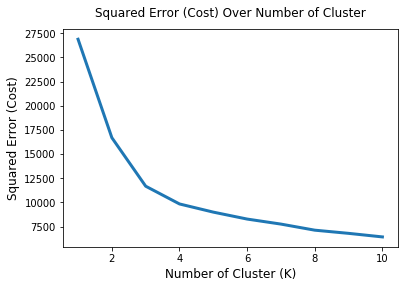

In [104]:
# Plot the Squared Error over number of cluster, k to find the optimum k value based on Elbow Method
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, random_state = 200) 
    KM.fit(final_X_train) 
      
    # calculates squared error for the clustered points 
    cost.append(KM.inertia_)      

# plot the cost against K values 
plt.plot(range(1, 11), cost, linewidth ='3') 
plt.xlabel("Number of Cluster (K)", fontsize = 12)
plt.ylabel("Squared Error (Cost)", fontsize = 12)  
plt.title("Squared Error (Cost) Over Number of Cluster", y = 1.03, fontsize = 12)
plt.savefig('task2bgraph1.png')
plt.show()

In [105]:
# From the graph, the point where the graph begins to plateau is k=3, so we choose 3 as the optimal value of k
kmeans = KMeans(n_clusters=3, random_state = 200)
kmeans.fit(final_X_train)

centroid = kmeans.cluster_centers_
labels = kmeans.labels_

In [106]:
# Insert column for Cluster Label of the training data
final_X_train['Cluster label'] = labels

In [107]:
final_X_test['Cluster label'] = kmeans.predict(final_X_test)

In [108]:
final_X_test.head()

,Access to electricity (% of population) [EG.ELC.ACCS.ZS],Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD],Age dependency ratio (% of working-age population) [SP.POP.DPND],"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]",Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD],"Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]",Fixed broadband subscriptions (per 100 people) [IT.NET.BBND.P2],Fixed telephone subscriptions (per 100 people) [IT.MLT.MAIN.P2],GDP per capita (constant 2010 US$) [NY.GDP.PCAP.KD],"GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]",...,SH.STA.BASS.UR.ZS_IT.NET.SECR.P6,SH.STA.BASS.UR.ZS_SL.EMP.SELF.FE.ZS,SH.STA.BASS.UR.ZS_SL.EMP.WORK.FE.ZS,SH.ANM.CHLD.ZS_IT.NET.SECR.P6,SH.ANM.CHLD.ZS_SL.EMP.SELF.FE.ZS,SH.ANM.CHLD.ZS_SL.EMP.WORK.FE.ZS,IT.NET.SECR.P6_SL.EMP.SELF.FE.ZS,IT.NET.SECR.P6_SL.EMP.WORK.FE.ZS,SL.EMP.SELF.FE.ZS_SL.EMP.WORK.FE.ZS,Cluster label
0,0.691183,3.720149,-0.433543,-0.773432,4.106182,-0.830533,2.218398,-0.002960,4.182142,4.242597,...,0.856138,-1.375533,1.372331,0.361475,-0.960334,-0.530822,-0.003638,0.980500,-1.464645,2
1,0.691183,-0.500752,-0.845122,-0.991674,-0.381154,-0.804852,-0.103999,0.171280,-0.507101,-0.526982,...,-0.373731,0.618034,0.304675,-0.308654,-0.390608,0.299837,-0.209064,-0.387337,1.277651,0
2,0.294965,-0.620606,-0.524206,0.133484,-0.568636,-0.410573,-0.785202,-0.865047,-0.618146,-0.653478,...,-0.403558,1.447200,-1.049030,-0.340825,1.105860,-0.483427,-0.249585,-0.408981,0.217428,1
3,-1.787862,-0.660979,1.891859,1.811521,-0.571197,1.513991,-0.879388,-0.942962,-0.630209,-0.672422,...,-0.407951,0.140886,-1.374405,-0.355407,1.228266,-1.161612,-0.268788,-0.410433,-0.663992,1
4,-0.133264,-0.434052,-0.215835,-0.230253,-0.357069,0.253356,-0.671398,-0.584514,-0.572718,-0.548370,...,-0.383143,0.361597,0.134327,-0.309365,-0.273677,0.790717,-0.222203,-0.391518,1.263571,0


In [109]:
# Select 4 best features based on ANOVA F-value
selector = SelectKBest(f_classif, k = 4)

# Present the 4 best features in dataframe
X_new = selector.fit_transform(final_X_train, y_train)
X_new_test = selector.transform(final_X_test)

In [110]:
selected_features = pd.DataFrame(selector.inverse_transform(X_new), 
                                 index=final_X_train.index,
                                 columns=final_X_train.columns)

selected_columns = selected_features.columns[selected_features.var() != 0]

In [111]:
final_X_train[selected_columns].head()

,"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]",SP.POP.DPND_SH.DTH.COMM.ZS,SH.DTH.COMM.ZS_SH.H2O.BASW.UR.ZS,SH.DTH.COMM.ZS_SH.ANM.CHLD.ZS
0,1.292590,0.898624,1.432539,1.351896
1,-0.734634,-0.704987,-0.736510,-0.725429
2,-0.307850,-0.508893,-0.240185,-0.488979
3,1.602979,1.865692,1.435712,2.570370
4,-0.749183,-0.737649,-0.765323,-0.751017


In [112]:
# X_train and X_test after feature selection
final_X_train = final_X_train[selected_columns]
final_X_test = pd.DataFrame(X_new_test, columns = selected_columns)

In [113]:
knn_X_train = final_X_train
knn_X_test = final_X_test

In [114]:
# Perform the KNN with the 4 selected features
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(knn_X_train, y_train)
knn_y_pred = knn.predict(knn_X_test)
knn_score = accuracy_score(y_test, knn_y_pred)
knn_score

0.7090909090909091

In [115]:
# EXTRA: Cross validate for more accurate result
knn_scores = cross_val_score(knn,knn_X_train,y_train,cv=20,
    scoring='accuracy')

In [116]:
knn_scores.mean()

0.7333333333333333

## Method 2: Using The First Four Features

In [117]:
# Extract first four features of the data
ff_X_train = imputed_X_train.copy().iloc[:, 0:4]
ff_X_test = imputed_X_test.copy().iloc[:, 0:4]


In [118]:
# Normalize the data
scaler_ff = preprocessing.StandardScaler().fit(ff_X_train)

ff_X_train = scaler_ff.transform(ff_X_train)
ff_X_test = scaler_ff.transform(ff_X_test)

In [119]:
# Perform KNN with k = 3
knn_ff = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_ff.fit(ff_X_train, y_train)
ff_y_pred = knn_ff.predict(ff_X_test)
ff_score = accuracy_score(y_test, ff_y_pred)
ff_score

0.6363636363636364

In [120]:
# EXTRA: Cross validate for more accurate result
ff_scores = cross_val_score(knn_ff, ff_X_train, y_train, cv=20,
    scoring='accuracy')
ff_scores.mean()

0.7321428571428571

## Method 3: Dimensionality Reduction Using Principal Component Analysis

In [121]:
pca_X_train = imputed_X_train.copy()
pca_X_test = imputed_X_test.copy()

In [122]:
# Normalize the data
scaler_pca = preprocessing.StandardScaler()

pca_X_train = scaler_pca.fit_transform(pca_X_train)
pca_X_test = scaler_pca.transform(pca_X_test)

In [123]:
# Perform PCA on the normalized data
pca = PCA(n_components = 4)

pca.fit(pca_X_train)
pca_X_train = pca.transform(pca_X_train)
pca_X_test = pca.transform(pca_X_test)


In [124]:
# Perform KNN with k = 3
knn_pca = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(pca_X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [125]:
# Display the sample of the reduced dataset
pd.DataFrame(pca_X_train, columns = ['pc1','pc2','pc3','pc4']).head()

,pc1,pc2,pc3,pc4
0,2.273725,0.105908,-0.393829,0.770467
1,-2.606225,-1.201405,-0.210355,-0.166186
2,-3.307587,0.460093,-1.009576,-0.189680
3,6.365711,1.825104,-0.199269,0.121889
4,-3.176539,-0.255947,-0.707322,-0.304417


In [126]:
pca_score = accuracy_score(y_test, knn_pca.predict(pca_X_test))
pca_score

0.7272727272727273

In [127]:
# EXTRA: Cross validate for more accurate result
pca_scores = cross_val_score(knn_pca, pca_X_train, y_train, cv=20,
   scoring='accuracy')
pca_scores.mean()

0.7559523809523809

In [128]:
print(f"Accuracy of feature engineering: {knn_score:.3f}")
print(f"Accuracy of PCA: {pca_score:.3f}")
print(f"Accuracy of first four features: {ff_score:.3f}")

Accuracy of feature engineering: 0.709
Accuracy of PCA: 0.727
Accuracy of first four features: 0.636
